# An example of how to test our IForestASD Implementation & Compare IForestASD against HSTrees

## Install skmultiflow if needed
You need to install git

In [1]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [2]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime

## Dataset Generation

In [3]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.7, random_state=1)

## General parameters for the evaluation

In [6]:
window = 100 #Number of data in the slinding window
n_estimator = 100 #Number of tree in the forest
anomaly_threshold = 0.5 #Anomaly detection score threshold
max_sample = 500 # We have gotten the size of the min dataset (Shuttle) to evaluate all dataset on the same basis.
n_wait = max_sample # The evaluation step size
drift_rate = 0.3 #The parameter u for IForestASD for the drift detector

# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy','f1','precision','recall', 'kappa', 'kappa_m', 'running_time','model_size'] 

## Run IForestASD and HSTrees on the generated dataset

<IPython.core.display.Javascript object>


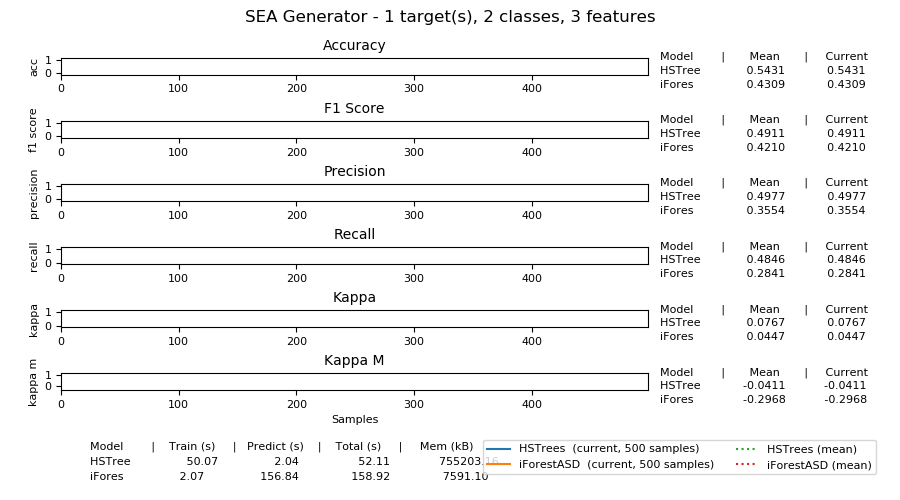

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [211.11s]
Processed samples: 500
Mean performance:
HSTrees - Accuracy     : 0.5431
HSTrees - Kappa        : 0.0767
HSTrees - Kappa M      : -0.0411
HSTrees - Precision: 0.4977
HSTrees - Recall: 0.4846
HSTrees - F1 score: 0.4911
HSTrees - Training time (s)  : 50.07
HSTrees - Testing time  (s)  : 2.04
HSTrees - Total time    (s)  : 52.11
HSTrees - Size (kB)          : 755203.1592
iForestASD - Accuracy     : 0.4309
iForestASD - Kappa        : 0.0447
iForestASD - Kappa M      : -0.2968
iForestASD - Precision: 0.3554
iForestASD - Recall: 0.2841
iForestASD - F1 score: 0.4210
iForestASD - Training time (s)  : 2.07
iForestASD - Testing time  (s)  : 156.84
iForestASD - Total time    (s)  : 158.92
iForestASD - Size (kB)          : 7591.0986

Please find evaluation results here results/Generator_2020-06-21 22:19:16.060065/result_for_WS100_NE100.csv


In [7]:
func.run_comparison(stream=stream, stream_n_features=stream.n_features, window = window, 
                             estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                             result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)